In [153]:
import networkx as nx
import matplotlib.pyplot as plt
from synutility.SynIO.data_type import load
from synutility.SynVis.graph_visualizer import GraphVisualizer
from typing import Tuple
import time
from itertools import chain, combinations
import pandas as pd
import numpy as np
from numpy.linalg import matrix_rank

In [90]:
data = load('data/ITS_graphs.pkl.gz')

In [91]:
# WP 1: find reaction center

def get_reaction_center(its_graph):

    def filter_rcs(G, u, v):
        return G.edges[u, v]['standard_order'] != 0
    
    reaction_center = nx.subgraph_view(its_graph, filter_edge=lambda u, v: filter_rcs(its_graph, u, v)).copy()
    reaction_center.remove_nodes_from(list(nx.isolates(reaction_center)))

    return reaction_center

In [92]:
# WP 1: calculate all reaction centers

for reaction in data:
    
    its_graph = reaction['ITS']
    reaction_center = get_reaction_center(its_graph)
    reaction['RC'] = reaction_center

In [93]:
data[0]

{'R-id': 7873,
 'ITS': <networkx.classes.graph.Graph at 0x2470379b250>,
 'class': 0,
 'RC': <networkx.classes.graph.Graph at 0x246a2f1f590>}

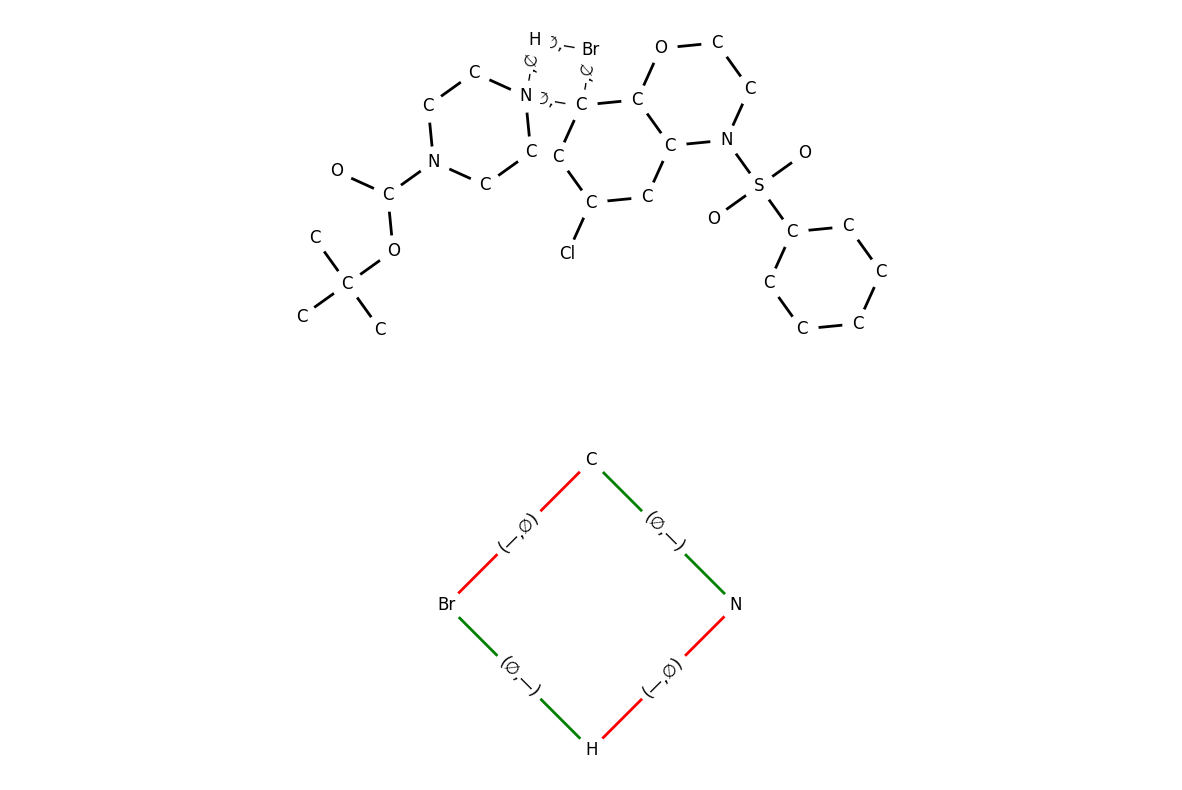

In [94]:
its_graph = data[0]['ITS']
reaction_center = data[0]['RC']

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
vis = GraphVisualizer()

# Plot ITS graph and its reaction center
vis.plot_its(its_graph, ax[0], use_edge_color=True)
vis.plot_its(reaction_center, ax[1], use_edge_color=True)

# Display the plots
plt.show()

In [95]:
# WP 2:

clusters = dict()

for reaction in data:
    rc = reaction['RC']
    for rc_key in clusters.keys():

        if nx.is_isomorphic(
            rc,
            rc_key,
            lambda n1, n2: n1['charge'] == n2['charge'] and n1['element'] == n2['element'],
            lambda e1, e2: e1['order'] == e2['order']
        ):
            clusters[rc_key].append(reaction)
            break
    else:

        clusters[rc] = [reaction]

In [96]:
len(clusters)

299

In [97]:
clusters

{<networkx.classes.graph.Graph at 0x246a2f1f590>: [{'R-id': 7873,
   'ITS': <networkx.classes.graph.Graph at 0x2470379b250>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x246a2f1f590>},
  {'R-id': 40699,
   'ITS': <networkx.classes.graph.Graph at 0x246a2ee7990>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x24632817150>},
  {'R-id': 49431,
   'ITS': <networkx.classes.graph.Graph at 0x246a2e91f50>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x24632d33650>},
  {'R-id': 38056,
   'ITS': <networkx.classes.graph.Graph at 0x246a2f2ef90>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x24632eafc10>},
  {'R-id': 44597,
   'ITS': <networkx.classes.graph.Graph at 0x246a2c9c610>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x24633adce10>},
  {'R-id': 45542,
   'ITS': <networkx.classes.graph.Graph at 0x246a2c3b550>,
   'class': 0,
   'RC': <networkx.classes.graph.Graph at 0x24633e944d0>},
  {'R-id': 29514,
   'ITS': <networkx.classes.

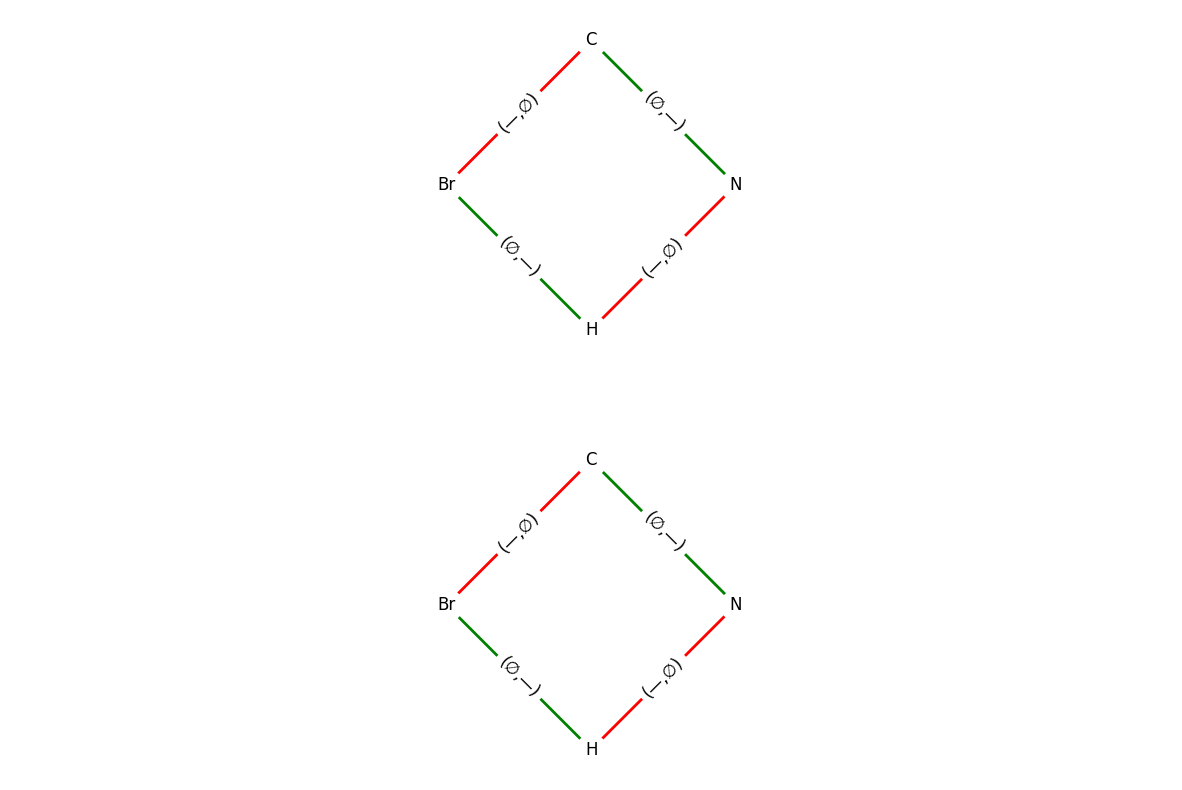

In [98]:
first_cluster = next(iter(clusters.values()))

rc1 = first_cluster[0]['RC']
rc2 = first_cluster[1]['RC']

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
vis = GraphVisualizer()

# Plot ITS graph and its reaction center
vis.plot_its(rc1, ax[0], use_edge_color=True)
vis.plot_its(rc2, ax[1], use_edge_color=True)

# Display the plots
plt.show()

In [99]:
len(data)

34395

In [196]:
# WP 3:


def vertex_count(G: nx.Graph) -> int:
    return G.number_of_nodes()

def edge_count(G: nx.Graph) -> int:
    return G.number_of_edges()

def vertex_degrees(G: nx.Graph) -> Tuple[int]:
    degree_list = [v for _, v in G.degree()]
    degree_list.sort()
    return tuple(degree_list)

def algebraic_connectivity(G: nx.Graph) -> float:
    return nx.algebraic_connectivity(G, seed=1337)

def rank(G: nx.Graph) -> int:
    adjacency_matrix = nx.to_numpy_array(G)
    return int(matrix_rank(adjacency_matrix))

invariant_functions = {
    "vertex_count": vertex_count,
    "edge_count": edge_count,
    "vertex_degrees": vertex_degrees,
#    "algebraic_connectivity": algebraic_connectivity,
    "rank": rank,
}

In [197]:
graph_invariants = dict()

for invariant_name, invariant_func in invariant_functions.items():

    start_time = time.time()

    graph_invariants[invariant_name] = {
        "reactions": {}
    }
    
    for reaction in data:

        r_id = reaction['R-id']

        graph_invariants[invariant_name]['reactions'][r_id] = invariant_func(reaction['RC'])


    end_time = time.time()

    graph_invariants[invariant_name]['execution_time_ms'] = (end_time - start_time) * 1000

In [198]:
graph_invariants

{'vertex_count': {'reactions': {7873: 4,
   42468: 4,
   24541: 4,
   40699: 4,
   34914: 4,
   11951: 4,
   15509: 4,
   49367: 4,
   28488: 4,
   10715: 4,
   7385: 6,
   32017: 4,
   24945: 4,
   49431: 4,
   41185: 4,
   25198: 4,
   42074: 4,
   1921: 4,
   24357: 4,
   6834: 4,
   32739: 4,
   21831: 6,
   14713: 4,
   17390: 4,
   38056: 4,
   47274: 4,
   4637: 4,
   34081: 4,
   18907: 4,
   2838: 4,
   23554: 6,
   8803: 4,
   6210: 4,
   33176: 4,
   8938: 4,
   27522: 4,
   47398: 4,
   33888: 4,
   36441: 4,
   10990: 4,
   1379: 4,
   38557: 5,
   15542: 4,
   23298: 4,
   22156: 4,
   45034: 4,
   21379: 4,
   15631: 4,
   12858: 6,
   8101: 4,
   5875: 4,
   1000: 4,
   44597: 4,
   25192: 4,
   37130: 4,
   11740: 4,
   24680: 4,
   4479: 4,
   45542: 4,
   4468: 4,
   10980: 4,
   49116: 4,
   7333: 4,
   4477: 4,
   15526: 4,
   46834: 4,
   26260: 4,
   5061: 4,
   4789: 4,
   1817: 4,
   14872: 4,
   29514: 4,
   32548: 4,
   39891: 4,
   2604: 4,
   34830: 6,
   2

In [199]:
for key, value in graph_invariants.items():
    print(f"{key}:  {value['execution_time_ms']:6f} ms")

vertex_count:  38.826466 ms
edge_count:  106.904984 ms
vertex_degrees:  134.176731 ms
rank:  1519.926786 ms


In [200]:
graph_invariant_keys = list(graph_invariants.keys())
invariant_powerset = list(chain.from_iterable(combinations(graph_invariant_keys, r) for r in range(1, len(graph_invariant_keys) + 1)))
invariant_powerset

[('vertex_count',),
 ('edge_count',),
 ('vertex_degrees',),
 ('rank',),
 ('vertex_count', 'edge_count'),
 ('vertex_count', 'vertex_degrees'),
 ('vertex_count', 'rank'),
 ('edge_count', 'vertex_degrees'),
 ('edge_count', 'rank'),
 ('vertex_degrees', 'rank'),
 ('vertex_count', 'edge_count', 'vertex_degrees'),
 ('vertex_count', 'edge_count', 'rank'),
 ('vertex_count', 'vertex_degrees', 'rank'),
 ('edge_count', 'vertex_degrees', 'rank'),
 ('vertex_count', 'edge_count', 'vertex_degrees', 'rank')]

In [201]:
invariant_clusters = dict()

for invariant_combination in invariant_powerset:
    
    clusters = dict()
    total_execution_time_ms = 0

    for invariant_name in invariant_combination:
        total_execution_time_ms += graph_invariants[invariant_name]['execution_time_ms']

    for reaction in data:
        r_id = reaction['R-id']

        invariant_aggregation = []
        for invariant_name in invariant_combination:
            invariant_aggregation.append(graph_invariants[invariant_name]['reactions'][r_id])

        invariant_tuple = tuple(invariant_aggregation)

        if invariant_tuple in clusters:
            clusters[invariant_tuple].append(r_id)
        else:
            clusters[invariant_tuple] = [r_id]

    invariant_clusters[invariant_combination] = {
        "clusters": clusters,
        "execution_time_ms": total_execution_time_ms,
    }


In [202]:
cluster_benchmarks = dict()

for key, value in invariant_clusters.items():

    clusters = value['clusters']
    execution_time_ms = value['execution_time_ms']
    cluster_variance = 0
    for cluster in clusters.values():
        cluster_variance += len(cluster) ** 2

    cluster_benchmarks[key] = {
        "execution_time_ms": execution_time_ms,
        "num_clusters": len(clusters),
        "num_clusters/ms": (len(clusters) / execution_time_ms),
        "variance": cluster_variance,
        "variance/ms": (cluster_variance / execution_time_ms)
    }

In [203]:
benchmark_df = pd.DataFrame.from_dict(cluster_benchmarks, orient="columns").T
benchmark_df

execution_time_ms  \
vertex_count   NaN            NaN            NaN           38.826466   
edge_count     NaN            NaN            NaN          106.904984   
vertex_degrees NaN            NaN            NaN          134.176731   
rank           NaN            NaN            NaN         1519.926786   
vertex_count   edge_count     NaN            NaN          145.731449   
               vertex_degrees NaN            NaN          173.003197   
               rank           NaN            NaN         1558.753252   
edge_count     vertex_degrees NaN            NaN          241.081715   
               rank           NaN            NaN         1626.831770   
vertex_degrees rank           NaN            NaN         1654.103518   
vertex_count   edge_count     vertex_degrees NaN          279.908180   
                              rank           NaN         1665.658236   
               vertex_degrees rank           NaN         1692.929983   
edge_count     vertex_degrees rank           NaN         1761.008501   
vertex_count   edge_count     vertex_degrees rank        1799.834967   

                                                   num_clusters  \
vertex_count   NaN            NaN            NaN           12.0   
edge_count     NaN            NaN            NaN           16.0   
vertex_degrees NaN            NaN            NaN           57.0   
rank           NaN            NaN            NaN           10.0   
vertex_count   edge_count     NaN            NaN           31.0   
               vertex_degrees NaN            NaN           57.0   
               rank           NaN            NaN           30.0   
edge_count     vertex_degrees NaN            NaN           57.0   
               rank           NaN            NaN           38.0   
vertex_degrees rank           NaN            NaN           68.0   
vertex_count   edge_count     vertex_degrees NaN           57.0   
                              rank           NaN           53.0   
               vertex_degrees rank           NaN           68.0   
edge_count     vertex_degrees rank           NaN           68.0   
vertex_count   edge_count     vertex_degrees rank          68.0   

                                                   num_clusters/ms  \
vertex_count   NaN            NaN            NaN          0.309068   
edge_count     NaN            NaN            NaN          0.149666   
vertex_degrees NaN            NaN            NaN          0.424813   
rank           NaN            NaN            NaN          0.006579   
vertex_count   edge_count     NaN            NaN          0.212720   
               vertex_degrees NaN            NaN          0.329474   
               rank           NaN            NaN          0.019246   
edge_count     vertex_degrees NaN            NaN          0.236434   
               rank           NaN            NaN          0.023358   
vertex_degrees rank           NaN            NaN          0.041110   
vertex_count   edge_count     vertex_degrees NaN          0.203638   
                              rank           NaN          0.031819   
               vertex_degrees rank           NaN          0.040167   
edge_count     vertex_degrees rank           NaN          0.038614   
vertex_count   edge_count     vertex_degrees rank         0.037781   

                                                      variance   variance/ms  
vertex_count   NaN            NaN            NaN   879322393.0  2.264750e+07  
edge_count     NaN            NaN            NaN   875995481.0  8.194150e+06  
vertex_degrees NaN            NaN            NaN   863788643.0  6.437693e+06  
rank           NaN            NaN            NaN   922628037.0  6.070214e+05  
vertex_count   edge_count     NaN            NaN   874632129.0  6.001670e+06  
               vertex_degrees NaN            NaN   863788643.0  4.992906e+06  
               rank           NaN            NaN   865626883.0  5.553328e+05  
edge_count     vertex_degrees NaN            NaN   863788643.0  3.582970

In [209]:
benchmark_df.sort_values("variance/ms", ascending=False)

execution_time_ms  \
vertex_count   NaN            NaN            NaN           38.826466   
edge_count     NaN            NaN            NaN          106.904984   
vertex_degrees NaN            NaN            NaN          134.176731   
vertex_count   edge_count     NaN            NaN          145.731449   
               vertex_degrees NaN            NaN          173.003197   
edge_count     vertex_degrees NaN            NaN          241.081715   
vertex_count   edge_count     vertex_degrees NaN          279.908180   
rank           NaN            NaN            NaN         1519.926786   
vertex_count   rank           NaN            NaN         1558.753252   
edge_count     rank           NaN            NaN         1626.831770   
vertex_degrees rank           NaN            NaN         1654.103518   
vertex_count   edge_count     rank           NaN         1665.658236   
               vertex_degrees rank           NaN         1692.929983   
edge_count     vertex_degrees rank           NaN         1761.008501   
vertex_count   edge_count     vertex_degrees rank        1799.834967   

                                                   num_clusters  \
vertex_count   NaN            NaN            NaN           12.0   
edge_count     NaN            NaN            NaN           16.0   
vertex_degrees NaN            NaN            NaN           57.0   
vertex_count   edge_count     NaN            NaN           31.0   
               vertex_degrees NaN            NaN           57.0   
edge_count     vertex_degrees NaN            NaN           57.0   
vertex_count   edge_count     vertex_degrees NaN           57.0   
rank           NaN            NaN            NaN           10.0   
vertex_count   rank           NaN            NaN           30.0   
edge_count     rank           NaN            NaN           38.0   
vertex_degrees rank           NaN            NaN           68.0   
vertex_count   edge_count     rank           NaN           53.0   
               vertex_degrees rank           NaN           68.0   
edge_count     vertex_degrees rank           NaN           68.0   
vertex_count   edge_count     vertex_degrees rank          68.0   

                                                   num_clusters/ms  \
vertex_count   NaN            NaN            NaN          0.309068   
edge_count     NaN            NaN            NaN          0.149666   
vertex_degrees NaN            NaN            NaN          0.424813   
vertex_count   edge_count     NaN            NaN          0.212720   
               vertex_degrees NaN            NaN          0.329474   
edge_count     vertex_degrees NaN            NaN          0.236434   
vertex_count   edge_count     vertex_degrees NaN          0.203638   
rank           NaN            NaN            NaN          0.006579   
vertex_count   rank           NaN            NaN          0.019246   
edge_count     rank           NaN            NaN          0.023358   
vertex_degrees rank           NaN            NaN          0.041110   
vertex_count   edge_count     rank           NaN          0.031819   
               vertex_degrees rank           NaN          0.040167   
edge_count     vertex_degrees rank           NaN          0.038614   
vertex_count   edge_count     vertex_degrees rank         0.037781   

                                                      variance   variance/ms  
vertex_count   NaN            NaN            NaN   879322393.0  2.264750e+07  
edge_count     NaN            NaN            NaN   875995481.0  8.194150e+06  
vertex_degrees NaN            NaN            NaN   863788643.0  6.437693e+06  
vertex_count   edge_count     NaN            NaN   874632129.0  6.001670e+06  
               vertex_degrees NaN            NaN   863788643.0  4.992906e+06  
edge_count     vertex_degrees NaN            NaN   863788643.0  3.582970e+06  
vertex_count   edge_count     vertex_degrees NaN   863788643.0  3.085971e+06  
rank           NaN            NaN            NaN   922628037.0  6.070214

In [212]:
benchmark_df.sort_values("variance", ascending=True)

execution_time_ms  \
vertex_count   vertex_degrees rank           NaN         1692.929983   
edge_count     vertex_degrees rank           NaN         1761.008501   
vertex_count   edge_count     vertex_degrees rank        1799.834967   
vertex_degrees rank           NaN            NaN         1654.103518   
vertex_count   edge_count     rank           NaN         1665.658236   
vertex_degrees NaN            NaN            NaN          134.176731   
edge_count     vertex_degrees NaN            NaN          241.081715   
vertex_count   vertex_degrees NaN            NaN          173.003197   
               edge_count     vertex_degrees NaN          279.908180   
edge_count     rank           NaN            NaN         1626.831770   
vertex_count   rank           NaN            NaN         1558.753252   
               edge_count     NaN            NaN          145.731449   
edge_count     NaN            NaN            NaN          106.904984   
vertex_count   NaN            NaN            NaN           38.826466   
rank           NaN            NaN            NaN         1519.926786   

                                                   num_clusters  \
vertex_count   vertex_degrees rank           NaN           68.0   
edge_count     vertex_degrees rank           NaN           68.0   
vertex_count   edge_count     vertex_degrees rank          68.0   
vertex_degrees rank           NaN            NaN           68.0   
vertex_count   edge_count     rank           NaN           53.0   
vertex_degrees NaN            NaN            NaN           57.0   
edge_count     vertex_degrees NaN            NaN           57.0   
vertex_count   vertex_degrees NaN            NaN           57.0   
               edge_count     vertex_degrees NaN           57.0   
edge_count     rank           NaN            NaN           38.0   
vertex_count   rank           NaN            NaN           30.0   
               edge_count     NaN            NaN           31.0   
edge_count     NaN            NaN            NaN           16.0   
vertex_count   NaN            NaN            NaN           12.0   
rank           NaN            NaN            NaN           10.0   

                                                   num_clusters/ms  \
vertex_count   vertex_degrees rank           NaN          0.040167   
edge_count     vertex_degrees rank           NaN          0.038614   
vertex_count   edge_count     vertex_degrees rank         0.037781   
vertex_degrees rank           NaN            NaN          0.041110   
vertex_count   edge_count     rank           NaN          0.031819   
vertex_degrees NaN            NaN            NaN          0.424813   
edge_count     vertex_degrees NaN            NaN          0.236434   
vertex_count   vertex_degrees NaN            NaN          0.329474   
               edge_count     vertex_degrees NaN          0.203638   
edge_count     rank           NaN            NaN          0.023358   
vertex_count   rank           NaN            NaN          0.019246   
               edge_count     NaN            NaN          0.212720   
edge_count     NaN            NaN            NaN          0.149666   
vertex_count   NaN            NaN            NaN          0.309068   
rank           NaN            NaN            NaN          0.006579   

                                                      variance   variance/ms  
vertex_count   vertex_degrees rank           NaN   863629921.0  5.101392e+05  
edge_count     vertex_degrees rank           NaN   863629921.0  4.904178e+05  
vertex_count   edge_count     vertex_degrees rank  863629921.0  4.798384e+05  
vertex_degrees rank           NaN            NaN   863629921.0  5.221136e+05  
vertex_count   edge_count     rank           NaN   863651551.0  5.185047e+05  
vertex_degrees NaN            NaN            NaN   863788643.0  6.437693e+06  
edge_count     vertex_degrees NaN            NaN   863788643.0  3.582970e+06  
vertex_count   vertex_degrees NaN            NaN   863788643.0  4.992906

In [211]:
benchmark_df.sort_values("num_clusters/ms", ascending=False)

execution_time_ms  \
vertex_degrees NaN            NaN            NaN          134.176731   
vertex_count   vertex_degrees NaN            NaN          173.003197   
               NaN            NaN            NaN           38.826466   
edge_count     vertex_degrees NaN            NaN          241.081715   
vertex_count   edge_count     NaN            NaN          145.731449   
                              vertex_degrees NaN          279.908180   
edge_count     NaN            NaN            NaN          106.904984   
vertex_degrees rank           NaN            NaN         1654.103518   
vertex_count   vertex_degrees rank           NaN         1692.929983   
edge_count     vertex_degrees rank           NaN         1761.008501   
vertex_count   edge_count     vertex_degrees rank        1799.834967   
                              rank           NaN         1665.658236   
edge_count     rank           NaN            NaN         1626.831770   
vertex_count   rank           NaN            NaN         1558.753252   
rank           NaN            NaN            NaN         1519.926786   

                                                   num_clusters  \
vertex_degrees NaN            NaN            NaN           57.0   
vertex_count   vertex_degrees NaN            NaN           57.0   
               NaN            NaN            NaN           12.0   
edge_count     vertex_degrees NaN            NaN           57.0   
vertex_count   edge_count     NaN            NaN           31.0   
                              vertex_degrees NaN           57.0   
edge_count     NaN            NaN            NaN           16.0   
vertex_degrees rank           NaN            NaN           68.0   
vertex_count   vertex_degrees rank           NaN           68.0   
edge_count     vertex_degrees rank           NaN           68.0   
vertex_count   edge_count     vertex_degrees rank          68.0   
                              rank           NaN           53.0   
edge_count     rank           NaN            NaN           38.0   
vertex_count   rank           NaN            NaN           30.0   
rank           NaN            NaN            NaN           10.0   

                                                   num_clusters/ms  \
vertex_degrees NaN            NaN            NaN          0.424813   
vertex_count   vertex_degrees NaN            NaN          0.329474   
               NaN            NaN            NaN          0.309068   
edge_count     vertex_degrees NaN            NaN          0.236434   
vertex_count   edge_count     NaN            NaN          0.212720   
                              vertex_degrees NaN          0.203638   
edge_count     NaN            NaN            NaN          0.149666   
vertex_degrees rank           NaN            NaN          0.041110   
vertex_count   vertex_degrees rank           NaN          0.040167   
edge_count     vertex_degrees rank           NaN          0.038614   
vertex_count   edge_count     vertex_degrees rank         0.037781   
                              rank           NaN          0.031819   
edge_count     rank           NaN            NaN          0.023358   
vertex_count   rank           NaN            NaN          0.019246   
rank           NaN            NaN            NaN          0.006579   

                                                      variance   variance/ms  
vertex_degrees NaN            NaN            NaN   863788643.0  6.437693e+06  
vertex_count   vertex_degrees NaN            NaN   863788643.0  4.992906e+06  
               NaN            NaN            NaN   879322393.0  2.264750e+07  
edge_count     vertex_degrees NaN            NaN   863788643.0  3.582970e+06  
vertex_count   edge_count     NaN            NaN   874632129.0  6.001670e+06  
                              vertex_degrees NaN   863788643.0  3.085971e+06  
edge_count     NaN            NaN            NaN   875995481.0  8.194150e+06  
vertex_degrees rank           NaN            NaN   863629921.0  5.221136